# Data Preparation and exploration
### AKANBI A.M

The initial phase of this project involves data cleaning and preprocessing. Real-world datasets often contain missing values, noise, and inconsistencies. Addressing missing values may require removing incomplete rows or imputing them using methods like mean or median imputation. Outliers, which can distort data distribution, should be removed or scaled.
In this section, we will cover:
- Reading in data from a CSV file
- Viewing data on a log plot

## Importing Libraries & Data

The first step is to import the libraries that we require. These will be:
- pandas for loading and storing the data
- matplotlib and seaborn for visualising the data
- numpy for a number of calculation methods
- sklern for building part of the model
- tensorflow for builiding the core model
- seaborn for visualization

In [1]:
!pip install pandas
!pip install matplotlib
!pip install numpy
!pip install scikit-learn
!pip install tensorflow
!pip install seaborn

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


In [84]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import numpy as np

Next, we’ll use the pandas `read_csv` function to load the data and assign it to the variable `df`. This will store the data in a structured format called a dataframe

In [85]:
df = pd.read_csv('welldata.csv')

The initial step after loading a dataset is to examine its contents. The `.describe()` method offers summary statistics for each numeric column in the dataframe. This includes details such as the count, mean, standard deviation, minimum and maximum values, as well as percentile values.

In [86]:
df.describe()

,Unnamed: 0,DTP_1,DTS_1,GR_1,MD_1,NPHI_1,RT_1,RHOB_1
count,25225.000000,22247.000000,7110.000000,17405.000000,25200.000000,10317.000000,23245.000000,10631.000000
mean,12612.000000,78.755918,139.543892,89.017662,1598.342599,0.167380,61.611110,2.476870
std,7281.974606,12.351177,18.765181,31.976397,952.192301,0.078063,302.924417,0.125215
min,0.000000,47.622173,99.878790,0.305100,0.200000,-0.030371,-999.990100,1.697240
25%,6306.000000,69.971130,123.984243,68.146370,787.375000,0.111129,4.938200,2.389408
50%,12612.000000,78.009560,140.274580,82.042340,1574.760250,0.163653,9.732183,2.489045
75%,18918.000000,87.157005,153.554225,101.049650,2362.154925,0.207136,18.584400,2.579605
max,25224.000000,129.992800,194.284620,343.692080,3799.680000,0.517698,2437.807900,3.032781


The next method to use is .info(). This method lists all the columns in the dataframe, their data types (such as float, integer, string, etc.), and the count of non-null values for each column.

In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25225 entries, 0 to 25224
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  25225 non-null  int64  
 1   DTP_1       22247 non-null  float64
 2   DTS_1       7110 non-null   float64
 3   GR_1        17405 non-null  float64
 4   MD_1        25200 non-null  float64
 5   NPHI_1      10317 non-null  float64
 6   RT_1        23245 non-null  float64
 7   RHOB_1      10631 non-null  float64
dtypes: float64(7), int64(1)
memory usage: 1.5 MB


## Data Cleaning and Visualization

if column `MD_1` is assumed to be measured depth then column `Unnamed` will be rendered useless, therefore it has to be dropped

In [88]:
df = df.drop(df.columns[0], axis=1)

In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25225 entries, 0 to 25224
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   DTP_1   22247 non-null  float64
 1   DTS_1   7110 non-null   float64
 2   GR_1    17405 non-null  float64
 3   MD_1    25200 non-null  float64
 4   NPHI_1  10317 non-null  float64
 5   RT_1    23245 non-null  float64
 6   RHOB_1  10631 non-null  float64
dtypes: float64(7)
memory usage: 1.3 MB


The `head()` and `tail()` functions are another set of useful methods. They return the first and last five rows of the dataframe, respectively

In [90]:
df.head()

,DTP_1,DTS_1,GR_1,MD_1,NPHI_1,RT_1,RHOB_1
0,NaN,NaN,NaN,0.2,NaN,NaN,NaN
1,NaN,NaN,NaN,0.5,NaN,NaN,NaN
2,NaN,NaN,NaN,1.0,NaN,NaN,NaN
3,NaN,NaN,NaN,1.5,NaN,NaN,NaN
4,NaN,NaN,NaN,2.0,NaN,NaN,NaN


In [91]:
df.tail()

,DTP_1,DTS_1,GR_1,MD_1,NPHI_1,RT_1,RHOB_1
25220,NaN,NaN,NaN,NaN,NaN,-999.99005,NaN
25221,NaN,NaN,NaN,NaN,NaN,-999.99010,NaN
25222,NaN,NaN,NaN,NaN,NaN,-999.99010,NaN
25223,NaN,NaN,NaN,NaN,NaN,-999.99005,NaN
25224,NaN,NaN,NaN,NaN,NaN,-999.99005,NaN


### Well Log Plots
it appears that there are alot of `NaN` values in the dataset. one way to evaluate the quantity of missing data set is be visualising the data

This `well_plot` function takes a number of arguments (inputs):
- **wellname**: the wellname as a string
- **dataframe**: the dataframe for the selected well
- **curves_to_plot**: a list of logging curves / dataframe columns we are wanting to plot
- **depth_curve**: the the depth curve we are wanting to plot against
- **log_curves**: a list of curves that need to be displayed on a logarithmic scale


In [92]:
def well_plot(wellname, dataframe, curves_to_plot, depth_curve, log_curves=[]):
    num_tracks = len(curves_to_plot)
  
    fig, ax = plt.subplots(nrows=1, ncols=num_tracks, figsize=(num_tracks*2, 10))

    fig.suptitle(wellname, fontsize=20, y=1.05)

    for i, curve in enumerate(curves_to_plot):
        
        
        ax[i].plot(dataframe[curve], depth_curve)

        ax[i].set_title(curve, fontsize=14, fontweight='bold')
        ax[i].grid(which='major', color='lightgrey', linestyle='-')

        ax[i].set_ylim(depth_curve.max(), depth_curve.min())

        if i == 0:
            ax[i].set_ylabel('DEPTH (m)', fontsize=18, fontweight='bold')
        else:
            plt.setp(ax[i].get_yticklabels(), visible = False)

        if curve in log_curves:
            ax[i].set_xscale('log')
            ax[i].grid(which='minor', color='lightgrey', linestyle='-')
    
    plt.tight_layout()
    plt.show()

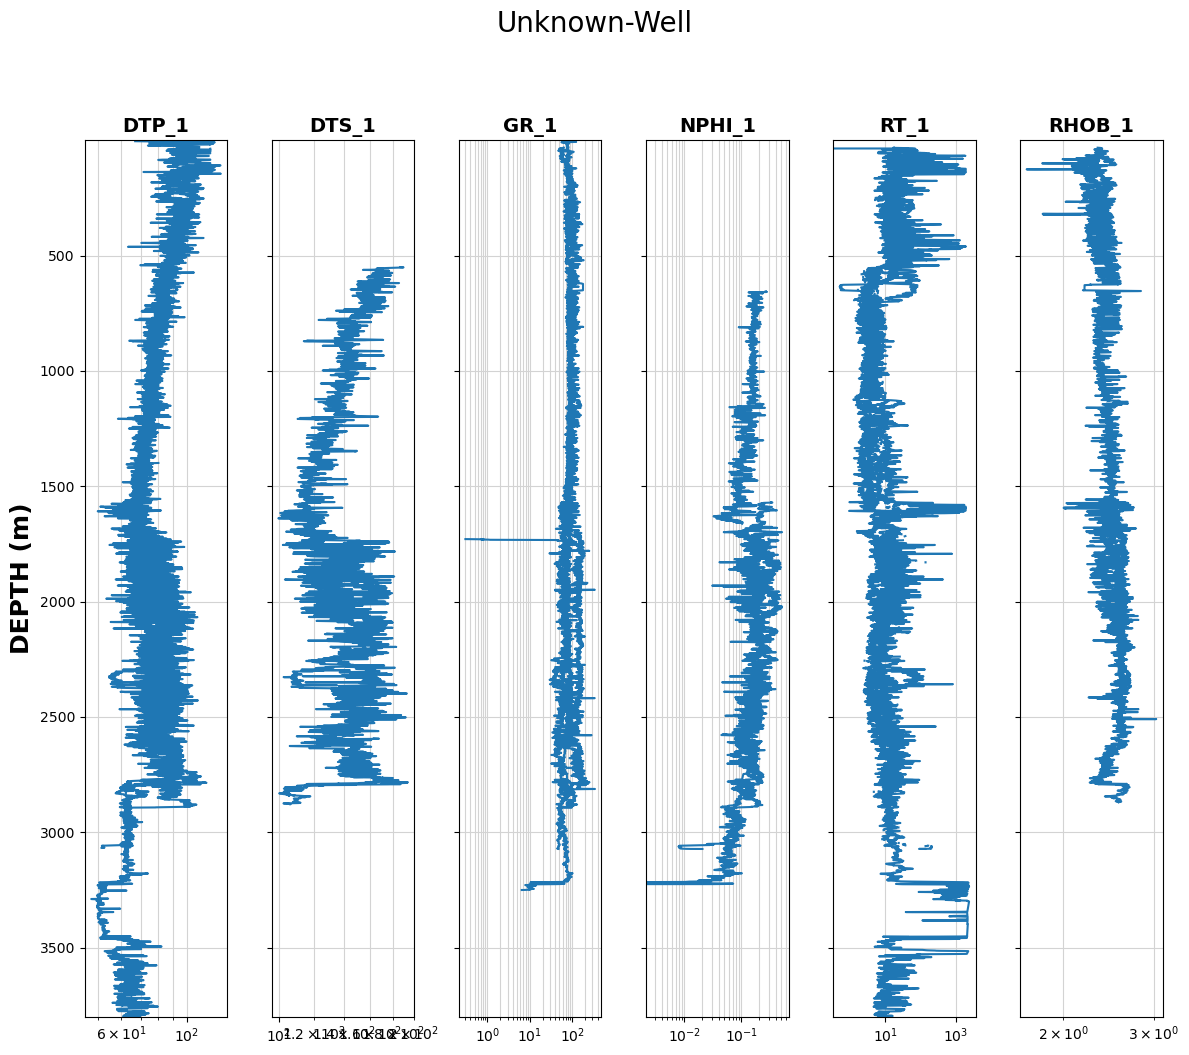

In [93]:
curves_to_plot = ['DTP_1','DTS_1','GR_1','NPHI_1','RT_1','RHOB_1']
logarithmic_curves = ['DTP_1','DTS_1','GR_1','NPHI_1','RT_1','RHOB_1']
well_plot("Unknown-Well", df, curves_to_plot, df['MD_1'], logarithmic_curves)

In [94]:
df.dropna(inplace=True)

In [95]:
df.head()

,DTP_1,DTS_1,GR_1,MD_1,NPHI_1,RT_1,RHOB_1
3216,62.136375,103.84200,124.418640,1607.9714,0.129799,587.60187,2.454789
3217,58.123062,103.84005,93.753400,1608.5188,0.093310,1458.09510,2.393845
3218,59.650417,103.98437,84.290550,1609.0269,0.074229,1756.11820,2.375702
3219,62.246384,104.75465,106.010025,1609.4774,0.095398,1450.80750,2.417671
3220,62.597550,106.55261,103.664490,1610.0365,0.091300,913.78500,2.501550


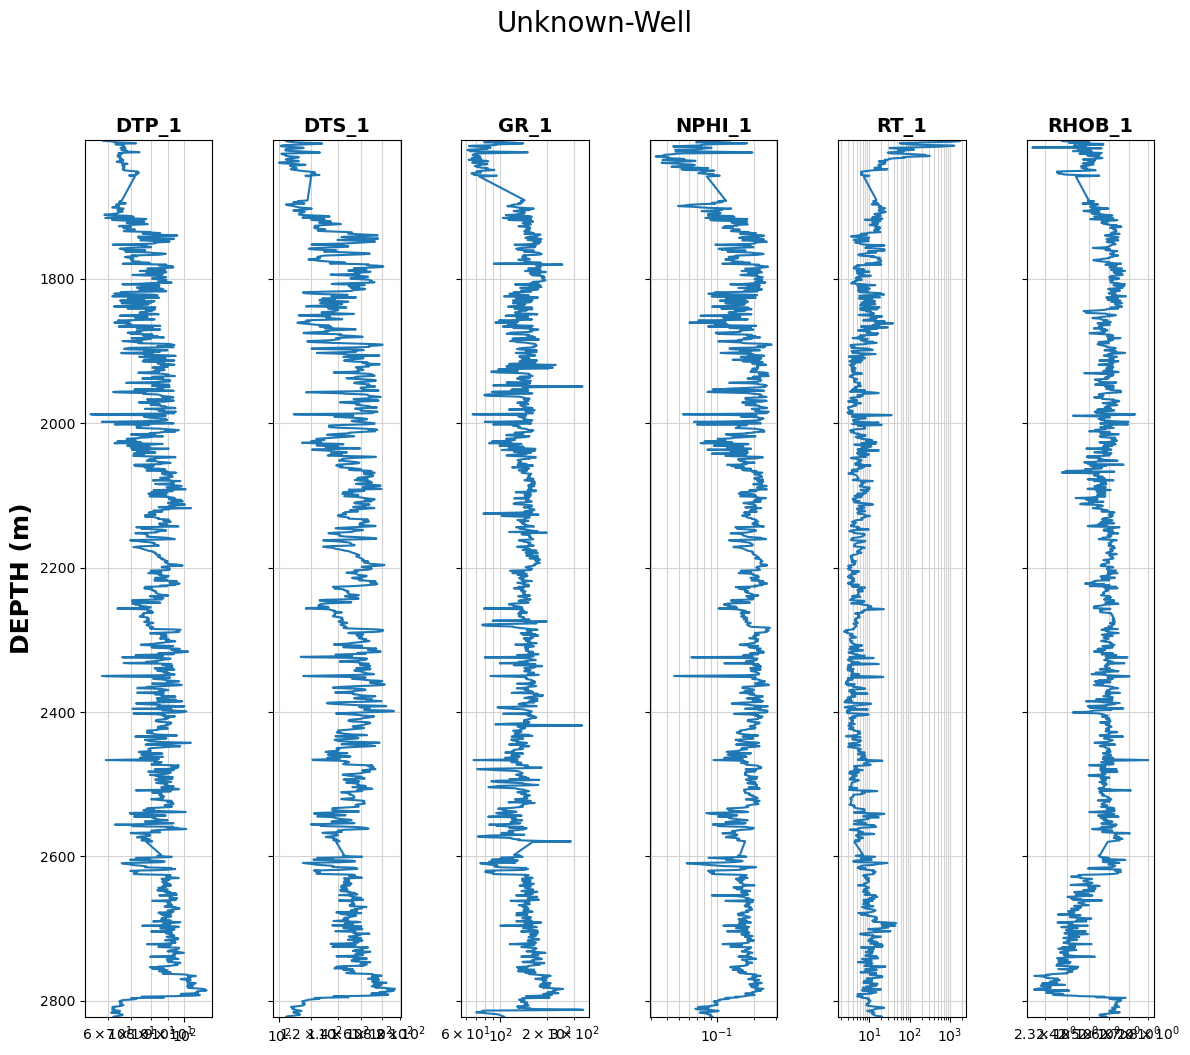

In [96]:
curves_to_plot = ['DTP_1','DTS_1','GR_1','NPHI_1','RT_1','RHOB_1']
logarithmic_curves = ['DTP_1','DTS_1','GR_1','NPHI_1','RT_1','RHOB_1']
well_plot("Unknown-Well", df, curves_to_plot, df['MD_1'], logarithmic_curves)

### Attending to Outlier

We can identify outlier using the isolation forest method(IF)

In [97]:
from sklearn.ensemble import IsolationForest
from sklearn.svm import OneClassSVM
from sklearn.neighbors import LocalOutlierFactor
import seaborn as sns
# Create a copy of the dataframe so that the original remanins untouched and extract the required curves
anomaly_df = df[['DTP_1','DTS_1','GR_1','NPHI_1','RT_1','RHOB_1']].copy()



# Define the inputs for the anomaly detection
anomaly_inputs = ['DTP_1','DTS_1','GR_1','NPHI_1','RT_1','RHOB_1']

# Setup the models, each will have a contamination (outlier) fraction of 0.1
# The random_state is set to allow repeatable results for the Isolation Forest. This can be omitted if required.
model_IF = IsolationForest(n_estimators=100, max_samples='auto', contamination=float(0.1), max_features=1.0, random_state=42)
model_SVM = OneClassSVM(nu=0.10)
model_lof = LocalOutlierFactor(contamination=0.1, novelty=True)

models = {'IF':model_IF}

for name, model in models.items():
    print(f'Fitting: {name}')
    model.fit(anomaly_df[anomaly_inputs])
    anomaly_df[f'{name}_anomaly_scores'] = model.decision_function(anomaly_df[anomaly_inputs])
    anomaly_df[f'{name}_anomaly'] = model.predict(anomaly_df[anomaly_inputs])

print('Model Fitting Complete')
anomaly_df.head(5)

Fitting: IF
Model Fitting Complete


,DTP_1,DTS_1,GR_1,NPHI_1,RT_1,RHOB_1,IF_anomaly_scores,IF_anomaly
3216,62.136375,103.84200,124.418640,0.129799,587.60187,2.454789,-0.168959,-1
3217,58.123062,103.84005,93.753400,0.093310,1458.09510,2.393845,-0.218639,-1
3218,59.650417,103.98437,84.290550,0.074229,1756.11820,2.375702,-0.220339,-1
3219,62.246384,104.75465,106.010025,0.095398,1450.80750,2.417671,-0.202045,-1
3220,62.597550,106.55261,103.664490,0.091300,913.78500,2.501550,-0.171345,-1


Outlier Method: IF
Number of anomalous values 233
Number of non anomalous values  2096
Total Number of Values: 2329


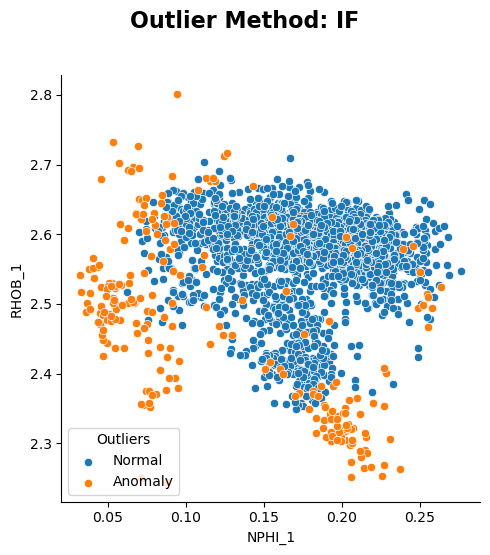

In [98]:
for name in models.keys():
    print(f'Outlier Method: {name}')
    method = f'{name}_anomaly'
    print(f"Number of anomalous values {len(anomaly_df[anomaly_df[method]==-1])}")
    print(f"Number of non anomalous values  {len(anomaly_df[anomaly_df[method]== 1])}")
    print(f'Total Number of Values: {len(anomaly_df)}')

    g = sns.FacetGrid(anomaly_df,  hue=method, height=5, hue_order=[1,-1])
    g.map(sns.scatterplot, 'NPHI_1', 'RHOB_1')
    
    g.fig.suptitle(f'Outlier Method: {name}', y=1.10, fontweight='bold', fontsize=16)

    axes = g.axes.flatten()
    for ax in axes:
        ax.legend(title='Outliers', loc='lower left', labels=['Normal', 'Anomaly'])

plt.show()


# Unsupervised Learning File

In [99]:
temp_df = anomaly_df.loc[anomaly_df['IF_anomaly'] == 1]

output_df = temp_df[['DTP_1','DTS_1','GR_1','NPHI_1','RT_1','RHOB_1']]


In [100]:
output_df.to_csv('processed_data.csv')

In [101]:
output_df

,DTP_1,DTS_1,GR_1,NPHI_1,RT_1,RHOB_1
3250,67.95939,126.389120,140.851150,0.194232,28.835499,2.526541
3251,64.48157,120.274810,106.157180,0.119739,29.511871,2.562202
3273,66.48857,111.806890,81.612240,0.067798,21.468916,2.502438
3283,66.38933,115.023420,77.535560,0.062499,17.415857,2.517508
3299,66.96749,111.029380,86.788540,0.079481,12.199284,2.532306
...,...,...,...,...,...,...
5638,66.21429,112.783140,97.583664,0.088579,12.633599,2.553252
5639,66.28049,112.091040,99.446070,0.090654,13.052850,2.551766
5640,65.88659,110.566200,100.058685,0.090205,13.747142,2.551933
5641,65.26776,109.113365,101.116714,0.089203,14.360171,2.551840


# Unsupervised Learning

### checking for correlation

In [113]:
data = pd.read_csv("processed_data.csv")
features = data[['DTP_1', 'DTS_1', 'GR_1', 'NPHI_1', 'RT_1', 'RHOB_1']]
features_np = features.values
correlation_matrix = np.corrcoef(features_np.T)
print(correlation_matrix)

[[ 1.          0.85677774  0.46085413  0.77577545 -0.35219175 -0.47667747]
 [ 0.85677774  1.          0.45704593  0.86994657 -0.48554728 -0.20388887]
 [ 0.46085413  0.45704593  1.          0.53360101 -0.08109119 -0.20551265]
 [ 0.77577545  0.86994657  0.53360101  1.         -0.50400443 -0.0783024 ]
 [-0.35219175 -0.48554728 -0.08109119 -0.50400443  1.         -0.26776918]
 [-0.47667747 -0.20388887 -0.20551265 -0.0783024  -0.26776918  1.        ]]


#### Strong Positive Correlations:

- DTP and DTS:

    These two variables have a very strong positive correlation of 0.8568. This suggests that they are highly correlated and tend to increase or decrease together.
    DTP and NPHI: There is a strong positive correlation of 0.7758 between DTP and NPHI, indicating that they are also closely related.
    DTS and NPHI: A strong positive correlation of 0.8699 exists between DTS and NPHI, suggesting a similar relationship to that between DTP and NPHI.

#### Moderate Positive Correlations:

- GR and NPHI: A moderate positive correlation of 0.5336 is observed between GR and NPHI. This indicates a somewhat weaker relationship compared to the previous pairs.

#### Negative Correlations:

- RT and all other variables: RT has negative correlations with all other variables, suggesting an inverse relationship. The strongest negative correlation is with DTP (-0.3522), followed by DTS (-0.4855) and NPHI (-0.5040).

### Key Observations:

    The relationships between DTP, DTS, and NPHI appear to be the strongest in the data.
    RT seems to have a relatively weak negative relationship with the other variables.
    The remaining variables (GR and RHOB) show moderate correlations with each other and with the other variables.

# Creating a model to predict `RT`
This is purely experimental because RT seems to have a relatively weak negative relationship with the other variables.

In [2]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import  MinMaxScaler

2024-10-04 12:25:30.664224: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [3]:
data = pd.read_csv("processed_data.csv")

In [4]:
features = data[['DTP_1', 'DTS_1', 'GR_1', 'NPHI_1', 'RT_1', 'RHOB_1']]
target = data['RT_1'] 


In [5]:
scaler = MinMaxScaler()
features_scaled = scaler.fit_transform(features)

In [6]:
X_train, X_test, y_train, y_test = train_test_split(features_scaled, target, test_size=0.2, random_state=42)

In [120]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='PReLU', input_shape=(features.shape[1],)),  # Input layer
    tf.keras.layers.Dense(32, activation='PReLU'),  # Hidden layer
    tf.keras.layers.Dense(16, activation='PReLU'),  # Hidden layer
    tf.keras.layers.Dense(8, activation='PReLU'),  # Hidden layer
    tf.keras.layers.Dense(4, activation='PReLU'),  # Hidden layer
    tf.keras.layers.Dense(2, activation='PReLU'),  # Hidden layer
    tf.keras.layers.Dense(1, activation='linear')  # Output layer (for regression)
])

In [126]:
model.compile(optimizer='adam', loss='mean_squared_error')  # For regression

In [ ]:
model.fit(X_train, y_train, epochs=1000, batch_size=320, validation_data=(X_test, y_test))

In [128]:
loss = model.evaluate(X_test, y_test)
print("Test Loss:", loss)

14/14 [==============================] - 0s 12ms/step - loss: 0.0012
Test Loss: 0.001185731845907867


In [ ]:
predictions = model.predict(X_test)

In [130]:
mse = tf.keras.metrics.MeanSquaredError()
mse.update_state(y_test, predictions)
mse_score = mse.result().numpy()
mse_score

0.0011857318

In [131]:
rmse = tf.math.sqrt(mse_score)
rmse

<tf.Tensor: shape=(), dtype=float32, numpy=0.034434456>

In [132]:
mae = tf.keras.metrics.MeanAbsoluteError()
mae.update_state(y_test, predictions)
mae_score = mae.result().numpy()
mae_score

0.033475865

In [135]:
precision = tf.keras.metrics.Precision()
precision.update_state(y_test, predictions)
precision_score = precision.result().numpy()
precision_score

1.0

Mean Absolute Error (MAE)  is low , indicating that our neural network model is making highly accurate predictions on the test data. This suggests that the model has learned the underlying patterns effectively and can generalize well to unseen examples.

## Saving Model 

In [136]:
model.save("prediction_model_RT.h5")

# Creating a model to predict `NPHI`



In [108]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import  MinMaxScaler

In [109]:
data = pd.read_csv("processed_data.csv")

In [110]:
features = data[['DTP_1', 'DTS_1', 'GR_1', 'NPHI_1', 'RT_1', 'RHOB_1']]
target = data['NPHI_1'] 

In [111]:
scaler = MinMaxScaler()
features_scaled = scaler.fit_transform(features)

In [112]:
X_train, X_test, y_train, y_test = train_test_split(features_scaled, target, test_size=0.2, random_state=42)

In [113]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='PReLU', input_shape=(features.shape[1],)),  # Input layer
    tf.keras.layers.Dense(32, activation='PReLU'),  # Hidden layer
    tf.keras.layers.Dense(1, activation='linear')  # Output layer (for regression)
])

In [114]:
model.compile(optimizer='adam', loss='mean_squared_error')  # For regression

In [115]:
model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/100
53/53 [==============================] - 2s 14ms/step - loss: 2.6651e-04 - val_loss: 6.4427e-05
Epoch 2/100
53/53 [==============================] - 1s 12ms/step - loss: 5.9572e-05 - val_loss: 3.0310e-05
Epoch 3/100
53/53 [==============================] - 1s 11ms/step - loss: 2.5655e-05 - val_loss: 1.6908e-05
Epoch 4/100
53/53 [==============================] - 1s 14ms/step - loss: 1.5117e-05 - val_loss: 9.2949e-06
Epoch 5/100
53/53 [==============================] - 1s 12ms/step - loss: 9.0852e-06 - val_loss: 6.2083e-06
Epoch 6/100
53/53 [==============================] - 1s 15ms/step - loss: 6.5048e-06 - val_loss: 5.7400e-06
Epoch 7/100
53/53 [==============================] - 1s 11ms/step - loss: 6.2079e-06 - val_loss: 4.4394e-06
Epoch 8/100
53/53 [==============================] - 1s 11ms/step - loss: 4.7673e-06 - val_loss: 5.8660e-06
Epoch 9/100
53/53 [==============================] - 1s 13ms/step - loss: 4.2137e-06 - val_loss: 3.2707e-06
Epoch 10/100
53/53 [========

In [116]:
loss = model.evaluate(X_test, y_test)
print("Test Loss:", loss)

14/14 [==============================] - 0s 4ms/step - loss: 2.2564e-07
Test Loss: 2.2564466917174286e-07


In [117]:
predictions = model.predict(X_test)

14/14 [==============================] - 0s 6ms/step


In [118]:
mse = tf.keras.metrics.MeanSquaredError()
mse.update_state(y_test, predictions)
mse_score = mse.result().numpy()
mse_score

2.256447e-07

## Saving Model 

In [120]:
model.save("prediction_model_NPHI.h5")